In [76]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import RidgeClassifier

In [77]:
df = pd.read_csv('prepDS.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     912 non-null    object
 1   description                    912 non-null    object
 2   employmentType                 912 non-null    object
 3   experienceRequirements         912 non-null    object
 4   hiringOrganization             912 non-null    object
 5   identifier                     912 non-null    object
 6   industry                       911 non-null    object
 7   jobLocation                    912 non-null    object
 8   skills                         5 non-null      object
 9   title                          912 non-null    object
 10  validThrough                   912 non-null    object
 11  jobLocationType                122 non-null    object
 12  applicantLocationRequirements  122 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html,desc
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...,responsibilities build long term causal estima...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...,responsibilities and duties ayata is looking f...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee...",responsibilities responsibilities being one of...
3,2021-03-22T20:24:23.000Z,Headspace is looking for a Data Scientist to h...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Headspace I...","{'@type': 'PropertyValue', 'name': 'Headspace ...","Marketing and Advertising,Computer Software,In...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist (Remote),2021-04-21T20:24:22.000Z,TELECOMMUTE,"{'@type': 'Country', 'name': 'United States'}",NaN,NaN,<em>Headspace is looking for a Data Scientist ...,successful candidate should love complex busin...
4,2021-03-23T09:07:02.000Z,DescriptionThe AWS Applications team builds po...,FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Amazon Web ...","{'@type': 'PropertyValue', 'name': 'Amazon Web...","Computer Software,Information Technology and S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist,2021-04-22T09:07:01.000Z,NaN,NaN,"{'@type': 'MonetaryAmount', 'currency': 'USD',...",NaN,<strong><u>Description<br><br></u></strong>The...,what you will do here we are looking for a sea...


# Prepare the explanatory variables and target variable

In [78]:
# Labels
labels = df.experienceRequirements.value_counts()
labels

Entry level         442
Mid-Senior level    205
Not Applicable      153
Associate           105
Internship            5
Director              2
Name: experienceRequirements, dtype: int64

In [79]:
labels = labels.index # get the index of labels
labels = labels[:4] # pick the 1st 5 label
labels

Index(['Entry level', 'Mid-Senior level', 'Not Applicable', 'Associate'], dtype='object')

In [80]:
df = df[df.experienceRequirements.isin(labels)].copy()
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     905 non-null    object
 1   description                    905 non-null    object
 2   employmentType                 905 non-null    object
 3   experienceRequirements         905 non-null    object
 4   hiringOrganization             905 non-null    object
 5   identifier                     905 non-null    object
 6   industry                       904 non-null    object
 7   jobLocation                    905 non-null    object
 8   skills                         5 non-null      object
 9   title                          905 non-null    object
 10  validThrough                   905 non-null    object
 11  jobLocationType                122 non-null    object
 12  applicantLocationRequirements  122 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html,desc
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...,responsibilities build long term causal estima...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...,responsibilities and duties ayata is looking f...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee...",responsibilities responsibilities being one of...


In [81]:
le = LabelEncoder()
y = le.fit_transform(df.experienceRequirements)
print(le.classes_)
df.experienceRequirements[:3],y[:3]

['Associate' 'Entry level' 'Mid-Senior level' 'Not Applicable']


(0    Mid-Senior level
 1         Entry level
 2      Not Applicable
 Name: experienceRequirements, dtype: object,
 array([2, 1, 3]))

In [82]:
vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range=(1,2),
                             norm='l2'
                             )
X = vectorizer.fit_transform(df.desc)
print(vectorizer.get_feature_names())
print(X.shape)
X.toarray()[:5,:5]

['00', '00 00', '00 121', '00 134', '00 138', '00 20', '00 affirmative', '00 compensation', '00 contribute', '00 days', '00 eastern', '00 est', '00 pm', '00 pmeeo', '000', '000 00', '000 121', '000 135', '000 150', '000 160', '000 165', '000 180', '000 70', '000 95', '000 annually', '000 based', '000 clients', '000 colleagues', '000 companies', '000 customers', '000 digitally', '000 employees', '000 experts', '000 ib', '000 industry', '000 jacobs', '000 largest', '000 organizations', '000 people', '000 plus', '000 position', '000 range', '000 restaurants', '000 retail', '000 software', '000 square', '000 staff', '000 strong', '000 students', '000 taskers', '000 teammates', '000 total', '000 tuition', '000 wunderman', '000 year', '000 yearly', '00001', '0070', '0070 equal', '00am', '00am 00pm', '00am 30pm', '00pm', '00pm pst', '01', '01 2021', '01 singapore', '022', '022 25311234', '03', '03 01', '03 20v', '0349', '0349 praveen', '04', '04 30', '048424', '048424 purposes', '05', '05 00'

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [83]:
tfi = X.mean(0)
tfi

matrix([[9.38414799e-04, 2.13590825e-04, 6.28225634e-05, ...,
         2.38012085e-05, 7.56056659e-05, 2.38012085e-05]])

In [84]:
tfi = np.array(tfi>0.0001).flatten()
tfi.shape

(113076,)

In [85]:
hff = np.array(vectorizer.get_feature_names())[list(tfi)]
hff.shape

(37889,)

In [87]:
X_df = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())
X_df = X_df[hff]

In [93]:
X_df.values.shape

(905, 37889)

In [94]:
svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(X_df.values)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 1%



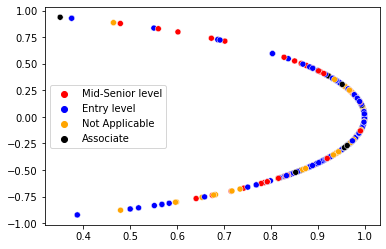

In [95]:
sns.scatterplot(x=X_lsa[:,0],
                y=X_lsa[:,1],
                hue=le.inverse_transform(y),
                palette=['red','blue','orange','black'])
plt.show()

In [96]:
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

print()

Explained variance of the SVD step: 26%



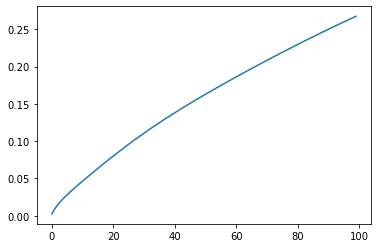

In [97]:
plt.plot(svd.explained_variance_ratio_.cumsum())

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_lsa,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(X_train.shape, X_test.shape)

(724, 100) (181, 100)


In [99]:
clf = RidgeClassifier().fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.6201657458563536, 0.5193370165745856)